# kNN

In [1]:
import requests
import pandas as pd
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data - a4a

In [2]:
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a4a"
download = requests.get(url)

with open("a4a", "wb") as file:
    file.write(download.content)
    X, y = load_svmlight_file("a4a")
    X = pd.DataFrame(X.todense())
    X["class"] = y

X = X.dropna()
random = X.sample(frac=1)
X = random
y = random["class"]
training = int(0.8 * len(random))
X_train, X_test = X[:training], X[training:]
y_train, y_test = y[:training], y[training:]

## Get Data - iris

In [3]:
url2 = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/iris.scale"
download2 = requests.get(url2)

with open("iris.scale", "wb") as file:
    file.write(download2.content)

    X2, y2 = load_svmlight_file("iris.scale")
    X2 = pd.DataFrame(X2.todense())
    X2["class"] = y2

X2 = X2.dropna()
random2 = X2.sample(frac=1)
X2 = random2
y2 = random2["class"]
training2 = int(0.8 * len(random2))
X_train2, X_test2 = X2[:training2], X2[training2:]
y_train2, y_test2 = y2[:training2], y2[training2:]

## Model

In [4]:
def EuclideanDistance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def ManhattanDistance(v1, v2):
    return np.sum(abs(v1 - v2))
    
    
def knn_ED(xtest, xtrain, ytrain, k):
    predicted = []
    for i, j in enumerate(xtest):
        distances = np.array([EuclideanDistance(xtest[i], xtrain[s]) 
                for s, t in enumerate(xtrain)])
        idx = np.argsort(distances)[:k]
        y_labels = [ytrain[i] for i in idx]
        nearest = max(set(y_labels), key = y_labels.count)
        predicted.append(nearest)
    return np.array(predicted)


def knn_MD(xtest, xtrain, ytrain, k):
    predicted = []
    for i, j in enumerate(xtest):
        distances = np.array([ManhattanDistance(xtest[i], xtrain[s]) 
                for s, t in enumerate(xtrain)])
        idx = np.argsort(distances)[:k]
        y_labels = [ytrain[i] for i in idx]
        nearest = max(set(y_labels), key = y_labels.count)
        predicted.append(nearest)
    return np.array(predicted)

## Binary Metrics

In [5]:
def accuracy_b(pred, actual):
    correct = []
    misclassified = []
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])

    accuracy = (len(correct))/(len(correct)+len(misclassified))
    return accuracy

def precision_b(pred, actual):
    correct = []
    misclassified = []
    
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])
            
    precision1 = (correct.count(1))/(correct.count(1)+misclassified.count(1))
    precision2 = (correct.count(-1))/(correct.count(-1)+misclassified.count(-1))
    total_precision = (precision1+precision2)/2
    return total_precision

def recall_b(pred, actual):
    correct = []
    misclassified = []
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])

    recall1 = (correct.count(1))/(correct.count(1)+misclassified.count(-1))
    recall2 = (correct.count(-1))/(correct.count(-1)+misclassified.count(1))
    total_recall = (recall1+recall2)/2
    return total_recall

def f1_b(pred, actual):
    f1_score = (2*(precision_b(pred, actual)*recall_b(pred, actual)))/(precision_b(pred, actual)+recall_b(pred, actual))
    return f1_score

## Multi-Class Metrics

In [6]:
def accuracy_mc(pred, actual):
    correct = []
    misclassified = []
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])

    accuracy = (len(correct))/(len(correct)+len(misclassified))
    return accuracy

def precision_mc(pred, actual):
    correct = []
    misclassified = []
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])

    precision1 = (correct.count(1))/(correct.count(1)+misclassified.count(1))
    precision2 = (correct.count(2))/(correct.count(2)+misclassified.count(2))
    precision3 = (correct.count(3))/(correct.count(3)+misclassified.count(3))
    total_precision = (precision1+precision2+precision3)/3
    return total_precision

def recall_mc(pred, actual):
    correct = []
    misclassified = []
    for i,j in enumerate(pred):
        if pred[i] == actual[i]:
            correct.append(pred[i])
        else:
            misclassified.append(pred[i])

    recall1 = (correct.count(1))/(correct.count(1)+misclassified.count(2)+misclassified.count(3))
    recall2 = (correct.count(2))/(correct.count(2)+misclassified.count(1)+misclassified.count(3))
    recall3 = (correct.count(3))/(correct.count(3)+misclassified.count(1)+misclassified.count(2))
    total_recall = (recall1+recall2+recall3)/3
    return total_recall

def f1_mc(pred, actual):
    f1_score = (2*(precision_mc(pred, actual)*recall_mc(pred, actual)))/(precision_mc(pred, actual)+recall_mc(pred, actual))
    return f1_score

## Binary Classification - Euclidean Distance

In [7]:
train_data = X_train.iloc[:,:-1]
train_data = train_data.values
test_data = X_test.iloc[:,:-1]
test_data = test_data.values

k_vals = range(1,20)
a_vals = []
p_vals = []
r_vals = []
f_vals = []

for k in k_vals:
    pred_plt = knn_ED(test_data, train_data, y_train.values, k)
    a_vals.append(accuracy_b(pred_plt, y_test.values))
    p_vals.append(precision_b(pred_plt, y_test.values))
    r_vals.append(recall_b(pred_plt, y_test.values))
    f_vals.append(f1_b(pred_plt, y_test.values))

### Plot Metrics

The optimal value for k is 13


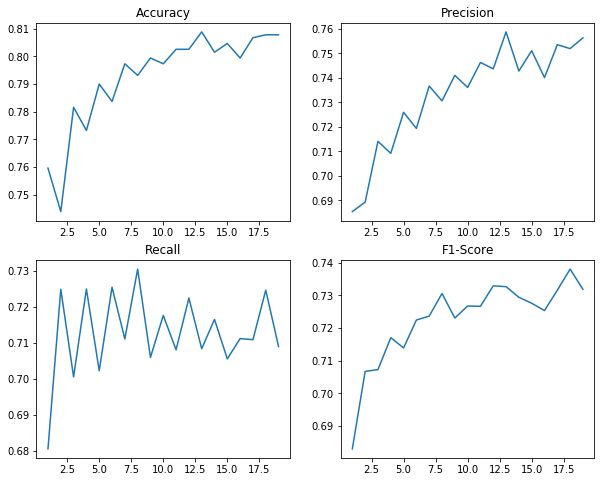

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(k_vals, a_vals)
plt.title("Accuracy")

plt.subplot(2,2,2)
plt.plot(k_vals, p_vals)
plt.title("Precision")

plt.subplot(2,2,3)
plt.plot(k_vals, r_vals)
plt.title("Recall")

plt.subplot(2,2,4)
plt.plot(k_vals, f_vals)
plt.title("F1-Score")

opt = a_vals.index(max(a_vals))
                    
print("The optimal value for k is", opt+1)

## Binary Classification - Manhattan Distance

In [9]:
k_vals = range(1,20)
a_vals2 = []
p_vals2 = []
r_vals2 = []
f_vals2 = []

for k in k_vals:
    pred_plt2 = knn_MD(test_data, train_data, y_train.values, k)
    a_vals2.append(accuracy_b(pred_plt2, y_test.values))
    p_vals2.append(precision_b(pred_plt2, y_test.values))
    r_vals2.append(recall_b(pred_plt2, y_test.values))
    f_vals2.append(f1_b(pred_plt2, y_test.values))

### Plot Metrics

The optimal value for k is 13


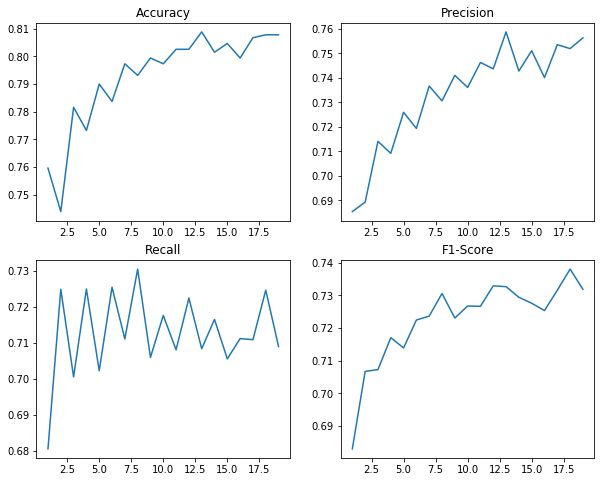

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(k_vals, a_vals2)
plt.title("Accuracy")

plt.subplot(2,2,2)
plt.plot(k_vals, p_vals2)
plt.title("Precision")

plt.subplot(2,2,3)
plt.plot(k_vals, r_vals2)
plt.title("Recall")

plt.subplot(2,2,4)
plt.plot(k_vals, f_vals2)
plt.title("F1-Score")

opt2 = a_vals2.index(max(a_vals2))

print("The optimal value for k is", opt2+1)

## Multi-class Classification - Euclidean Distance

In [11]:
train_data2 = X_train2.iloc[:,:-1]
train_data2 = train_data2.values
test_data2 = X_test2.iloc[:,:-1]
test_data2 = test_data2.values

k_vals = range(1,20)
a_vals3 = []
p_vals3 = []
r_vals3 = []
f_vals3 = []

for k in k_vals:
    pred_plt3 = knn_ED(test_data2, train_data2, y_train2.values, k)
    a_vals3.append(accuracy_mc(pred_plt3, y_test2.values))
    p_vals3.append(precision_mc(pred_plt3, y_test2.values))
    r_vals3.append(recall_mc(pred_plt3, y_test2.values))
    f_vals3.append(f1_mc(pred_plt3, y_test2.values))

### Plot Metrics

The optimal value for k is 1


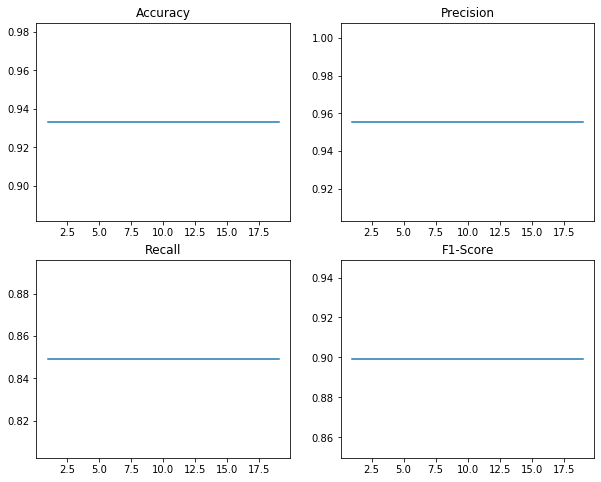

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(k_vals, a_vals3)
plt.title("Accuracy")

plt.subplot(2,2,2)
plt.plot(k_vals, p_vals3)
plt.title("Precision")

plt.subplot(2,2,3)
plt.plot(k_vals, r_vals3)
plt.title("Recall")

plt.subplot(2,2,4)
plt.plot(k_vals, f_vals3)
plt.title("F1-Score")

opt3 = a_vals3.index(max(a_vals3))
                    
print("The optimal value for k is", opt3+1)

## Multi-class Classification - Manhattan Distance

In [13]:
k_vals = range(1,20)
a_vals4 = []
p_vals4 = []
r_vals4 = []
f_vals4 = []

for k in k_vals:
    pred_plt4 = knn_MD(test_data2, train_data2, y_train2.values, k)
    a_vals4.append(accuracy_mc(pred_plt4, y_test2.values))
    p_vals4.append(precision_mc(pred_plt4, y_test2.values))
    r_vals4.append(recall_mc(pred_plt4, y_test2.values))
    f_vals4.append(f1_mc(pred_plt4, y_test2.values))

### Plot Metrics

The optimal value for k is 1


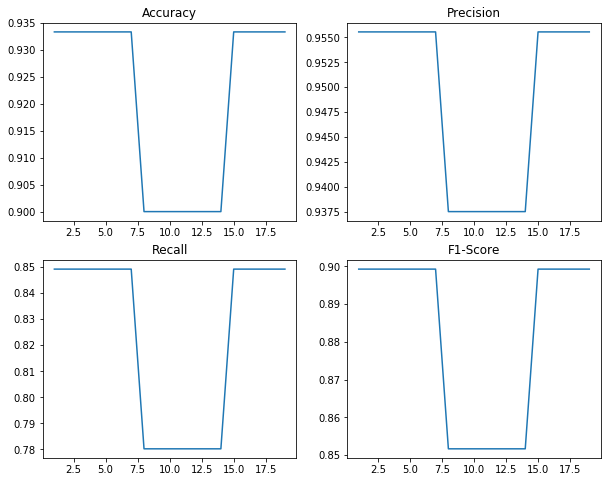

In [14]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(k_vals, a_vals4)
plt.title("Accuracy")

plt.subplot(2,2,2)
plt.plot(k_vals, p_vals4)
plt.title("Precision")

plt.subplot(2,2,3)
plt.plot(k_vals, r_vals4)
plt.title("Recall")

plt.subplot(2,2,4)
plt.plot(k_vals, f_vals4)
plt.title("F1-Score")

opt4 = a_vals4.index(max(a_vals4))
                      
print("The optimal value for k is", opt4+1)